In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
pd.set_option('display.max_columns', None)

In [93]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [94]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,0,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,2.0,2.0,2,1.0,Na,Moderately Old,780.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,house,independent,sector 39,1.80,21871.0,823.0,1.0,1.0,2,3.0,North-East,Relatively New,NaN,800.0,720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,house,vipul tatvam villa,sector 48,7.35,22812.0,3222.0,4.0,5.0,2,2.0,South,Moderately Old,3222.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,4.0,1.0,144.0
3,3,flat,mapsko casa bella,sector 82,3.00,6134.0,4891.0,4.0,6.0,3+,25.0,West,Relatively New,4890.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,119.0
4,4,flat,ansal heights 86,sector 86,0.64,4706.0,1360.0,2.0,2.0,1,3.0,Na,New Property,NaN,1360.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0


In [95]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  249
agePossession             0
super_built_up_area    1234
built_up_area          2501
carpet_area            1775
study room                0
servant room              0
store room                0
pooja room                0
others                    0
Wardrobe                  0
furnishing_type           0
luxury_score              0
dtype: int64

### built_up_area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

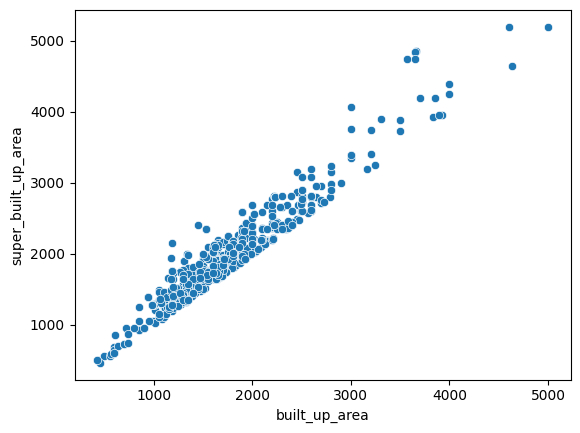

In [96]:
sns.scatterplot(data=df,x='built_up_area',y='super_built_up_area')

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

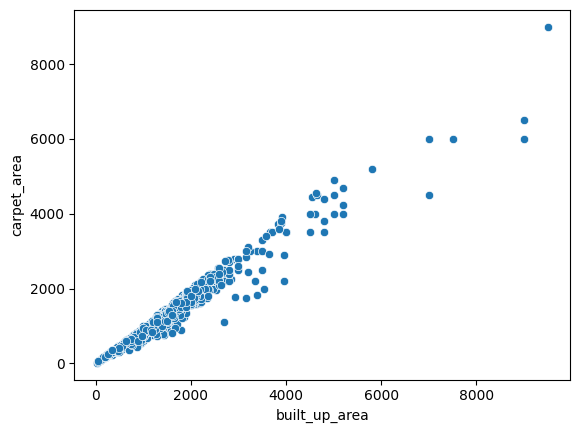

In [97]:
sns.scatterplot(data=df,x='built_up_area',y='carpet_area')

In [98]:
df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score


In [99]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [100]:
all_present_df.shape

(531, 24)

In [101]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [102]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [103]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [104]:
#both present but built up null
sbc_df = df[(df['super_built_up_area'].isnull()) & ~(df['built_up_area'].isnull()) & (~df['carpet_area'].isnull())]

In [105]:
sbc_df

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
1,1,house,independent,sector 39,1.80,21871.0,823.0,1.0,1.0,2,3.0,North-East,Relatively New,NaN,800.000000,720.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,house,independent,sector 110,1.00,8795.0,1137.0,3.0,2.0,2,1.0,North,Old Property,NaN,120.000000,100.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,6,flat,signature global park,sohna road,0.95,7845.0,1211.0,3.0,2.0,3+,1.0,Na,Relatively New,NaN,1210.723472,756.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0
46,46,flat,ardee city,sector 52,1.55,7381.0,2100.0,4.0,4.0,3,1.0,Na,Moderately Old,NaN,2100.000000,1600.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47,47,flat,signature the roselia,sector 95,0.41,6193.0,662.0,2.0,2.0,2,12.0,North,New Property,NaN,670.000000,569.25,1.0,0.0,0.0,0.0,0.0,2.0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,3689,house,independent,sector 17b,8.50,18814.0,4518.0,4.0,4.0,2,2.0,West,Old Property,NaN,500.000000,400.00,1.0,1.0,0.0,1.0,0.0,4.0,1.0,21.0
3546,3708,house,independent,sector 14,6.40,20317.0,3150.0,6.0,6.0,3+,3.0,North,Old Property,NaN,349.000000,348.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0
3548,3710,flat,gls avenue 51,sector 92,0.45,7614.0,591.0,2.0,2.0,1,10.0,Na,New Property,NaN,646.000000,591.00,1.0,0.0,0.0,0.0,0.0,2.0,1.0,20.0
3566,3731,flat,experion the heartsong,sector 108,2.08,9905.0,2100.0,4.0,4.0,3+,3.0,East,Relatively New,NaN,2631.000000,2100.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,126.0


In [106]:
sbc_df['super_built_up_area'].fillna(round(((sbc_df['built_up_area']*1.105) + (sbc_df['carpet_area']*0.9))/2),inplace=True)

<ipython-input-106-bde84d191d57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['super_built_up_area'].fillna(round(((sbc_df['built_up_area']*1.105) + (sbc_df['carpet_area']*0.9))/2),inplace=True)


In [107]:
df.update(sbc_df)

In [108]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  249
agePossession             0
super_built_up_area    1010
built_up_area          2501
carpet_area            1775
study room                0
servant room              0
store room                0
pooja room                0
others                    0
Wardrobe                  0
furnishing_type           0
luxury_score              0
dtype: int64

In [109]:
# super_built_up present and all null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [110]:
sb_df

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,0.0,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,2.0,2.0,2,1.0,Na,Moderately Old,780.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,house,vipul tatvam villa,sector 48,7.35,22812.0,3222.0,4.0,5.0,2,2.0,South,Moderately Old,3222.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,4.0,1.0,144.0
3,3.0,flat,mapsko casa bella,sector 82,3.00,6134.0,4891.0,4.0,6.0,3+,25.0,West,Relatively New,4890.0,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,119.0
8,8.0,house,independent,sector 43,7.50,38760.0,1935.0,12.0,12.0,3+,4.0,East,New Property,1935.0,NaN,NaN,1.0,1.0,1.0,1.0,0.0,12.0,1.0,72.0
13,13.0,flat,antriksh heights,sector 84,0.79,4580.0,1725.0,3.0,3.0,3+,8.0,West,New Property,1725.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,3786.0,flat,m3m woodshire,sector 107,1.40,5930.0,2361.0,3.0,4.0,0,1.0,East,New Property,2361.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
3620,3789.0,house,dlf city plots phase 2,sector 25,7.50,31686.0,2367.0,9.0,9.0,3+,4.0,West,Relatively New,2367.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,4.0,1.0,160.0
3624,3793.0,flat,dlf new town heights,sector 90,1.20,6218.0,1930.0,3.0,3.0,3+,15.0,North,Relatively New,1930.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
3628,3797.0,house,rajendra park gurgaon,sector 105,0.37,10278.0,360.0,4.0,3.0,2,3.0,East,Relatively New,360.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-111-554030e2e595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [112]:
sb_df['carpet_area'].fillna(round(sb_df['built_up_area']/0.9),inplace=True)

<ipython-input-112-88b7a2de036e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['carpet_area'].fillna(round(sb_df['built_up_area']/0.9),inplace=True)


In [113]:
df.update(sb_df)

In [114]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  249
agePossession             0
super_built_up_area    1010
built_up_area          1102
carpet_area             376
study room                0
servant room              0
store room                0
pooja room                0
others                    0
Wardrobe                  0
furnishing_type           0
luxury_score              0
dtype: int64

In [115]:
carpet_to_Super_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['carpet_area']).median()

In [116]:
carpet_to_Super_built_up_ratio

1.265625

In [117]:
# super is null and all is notnull
c_df2 = df[(df['super_built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [118]:
c_df2['super_built_up_area'].fillna(round((c_df2['carpet_area']*1.26+c_df2['carpet_area']*1.1)/2),inplace=True)

<ipython-input-118-8f2e05b6fdc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df2['super_built_up_area'].fillna(round((c_df2['carpet_area']*1.26+c_df2['carpet_area']*1.1)/2),inplace=True)


In [119]:
df.update(c_df2)

In [120]:
df.isnull().sum()

Unnamed: 0                0
property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  249
agePossession             0
super_built_up_area     329
built_up_area          1102
carpet_area             376
study room                0
servant room              0
store room                0
pooja room                0
others                    0
Wardrobe                  0
furnishing_type           0
luxury_score              0
dtype: int64

In [121]:
bn_df= df[(df['built_up_area'].isnull()) & ~(df['super_built_up_area'].isnull())]

In [122]:
bn_df['built_up_area'].fillna(round(bn_df['super_built_up_area']/1.1),inplace=True)

<ipython-input-122-82f10da26a57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bn_df['built_up_area'].fillna(round(bn_df['super_built_up_area']/1.1),inplace=True)


In [123]:
df.update(bn_df)

In [126]:
#super null area all
su_na=df[df['super_built_up_area'].isnull()]

In [127]:
su_na['super_built_up_area'] = su_na['area']

<ipython-input-127-a9a2bc6f0ef2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  su_na['super_built_up_area'] = su_na['area']


In [128]:
df.update(su_na)

<Axes: xlabel='super_built_up_area', ylabel='price'>

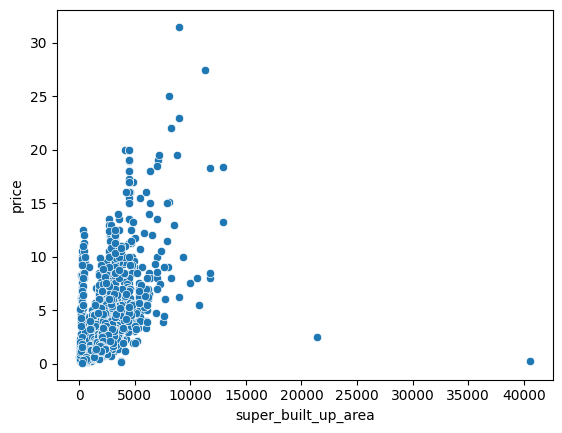

In [129]:
sns.scatterplot(data=df,x='super_built_up_area',y='price')

In [130]:
anamoly_df = df[(df['super_built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [131]:
anamoly_df.sample(5)

,price,area,built_up_area
1624,4.30,1575.0,145.0
571,3.20,4860.0,489.0
1871,4.60,1426.0,1426.0
687,2.90,1557.0,1415.0
1873,3.49,1728.0,1564.0


In [132]:
anamoly_df['super_built_up_area'] = anamoly_df['area']

In [133]:
df.update(anamoly_df)

<Axes: xlabel='super_built_up_area', ylabel='price'>

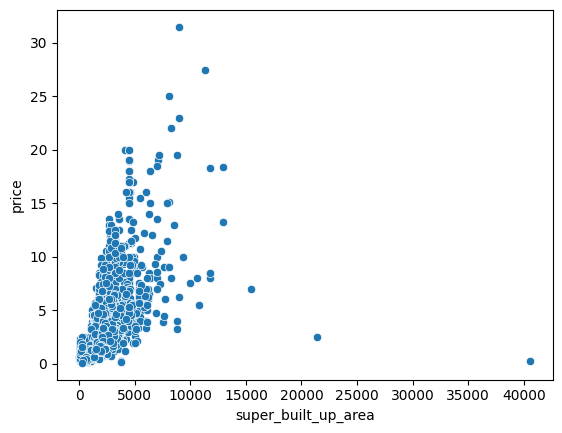

In [134]:
sns.scatterplot(data=df,x='super_built_up_area',y='price')

In [87]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
0,0.0,flat,ashiana apartment,sector 23,0.16,2051.0,780.0,2.0,2.0,2,1.0,Na,Moderately Old,780.0,706.0,784.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,house,independent,sector 39,1.80,21871.0,823.0,1.0,1.0,2,3.0,North-East,Relatively New,766.0,800.0,720.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,house,vipul tatvam villa,sector 48,7.35,22812.0,3222.0,4.0,5.0,2,2.0,South,Moderately Old,3222.0,2916.0,3240.0,1.0,1.0,1.0,1.0,0.0,4.0,1.0,144.0
3,3.0,flat,mapsko casa bella,sector 82,3.00,6134.0,4891.0,4.0,6.0,3+,25.0,West,Relatively New,4890.0,4425.0,4917.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,119.0
4,4.0,flat,ansal heights 86,sector 86,0.64,4706.0,1360.0,2.0,2.0,1,3.0,Na,New Property,NaN,1360.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0


In [135]:
df.drop(columns=['area','built_up_area','carpet_area','Unnamed: 0'],inplace=True)

In [136]:
df.isnull().sum()

property_type            0
society                  0
sector                   0
price                    0
price_per_sqft           0
bedRoom                  0
bathroom                 0
balcony                  0
floorNum                17
facing                 249
agePossession            0
super_built_up_area      0
study room               0
servant room             0
store room               0
pooja room               0
others                   0
Wardrobe                 0
furnishing_type          0
luxury_score             0
dtype: int64

### floorNum

In [137]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,study room,servant room,store room,pooja room,others,Wardrobe,furnishing_type,luxury_score
53,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1177,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1645,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1807,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2038,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
2197,house,uppal southend,sector 49,6.75,32328.0,12.0,12.0,3+,NaN,West,Moderately Old,2088.0,1.0,1.0,0.0,1.0,1.0,22.0,1.0,49.0
2283,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,4779.0,0.0,1.0,1.0,1.0,0.0,6.0,1.0,114.0
2396,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2409,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0


In [138]:
df[df['property_type'] == 'house']['floorNum'].median()

3.0

In [139]:
df['floorNum'].fillna(3.0,inplace=True)

### facing

<Axes: ylabel='facing'>

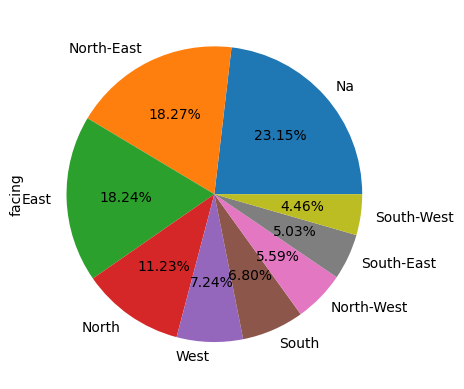

In [140]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [141]:
df.drop(columns=['facing'],inplace=True)

In [142]:
df.isnull().sum()

property_type          0
society                0
sector                 0
price                  0
price_per_sqft         0
bedRoom                0
bathroom               0
balcony                0
floorNum               0
agePossession          0
super_built_up_area    0
study room             0
servant room           0
store room             0
pooja room             0
others                 0
Wardrobe               0
furnishing_type        0
luxury_score           0
dtype: int64

### age Possession

In [149]:
df['agePossession'].value_counts()

Relatively New        1749
New Property           622
Moderately Old         598
Old Property           333
Under Construction     277
Undefined               53
Name: agePossession, dtype: int64

In [147]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [148]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [150]:
df['agePossession'].value_counts()

Relatively New        1749
New Property           622
Moderately Old         598
Old Property           333
Under Construction     277
Undefined               53
Name: agePossession, dtype: int64

In [151]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [152]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [154]:
df['agePossession'].value_counts()

Relatively New        1763
New Property           623
Moderately Old         605
Old Property           336
Under Construction     277
Undefined               28
Name: agePossession, dtype: int64

In [155]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [156]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [157]:
df['agePossession'].value_counts()

Relatively New        1763
Moderately Old         633
New Property           623
Old Property           336
Under Construction     277
Name: agePossession, dtype: int64

In [158]:
df.isnull().sum()

property_type          0
society                0
sector                 0
price                  0
price_per_sqft         0
bedRoom                0
bathroom               0
balcony                0
floorNum               0
agePossession          0
super_built_up_area    0
study room             0
servant room           0
store room             0
pooja room             0
others                 0
Wardrobe               0
furnishing_type        0
luxury_score           0
dtype: int64

In [159]:
df.to_csv('gurgaon_properties_final.csv',index=False)